# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Ayudha Kusuma Rahmadhani
- **Email:** yudhadeux@gmail.com

## Menentukan Pertanyaan Bisnis

- Bagaimana tren jumlah pesanan dan total revenue perusahaan pada periode Januari–Desember 2017 berdasarkan data transaksi yang tersedia?
- Kategori produk apa yang paling banyak dan paling sedikit terjual sepanjang tahun 2017 berdasarkan total item yang terjual?
- Bagaimana demografi pelanggan pada tahun 2018?


## Import Semua Packages/Library

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
import matplotlib.dates as mdates
!pip install unidecode
from unidecode import unidecode

In [43]:
path = "data"
csv_files = [f for f in os.listdir(path) if f.endswith(".csv")]

In [44]:
os.listdir()

['.config', '.ipynb_checkpoints', 'data', 'sample_data']

## Data Wrangling

### Gathering Data

In [45]:
# Path ke direktori data
dataset_path = "data"

# Load semua dataset
customers_df = pd.read_csv(os.path.join(dataset_path, "customers_dataset.csv"))
geolocation_df = pd.read_csv(os.path.join(dataset_path, "geolocation_dataset.csv"))
order_items_df = pd.read_csv(os.path.join(dataset_path, "order_items_dataset.csv"))
order_payments_df = pd.read_csv(os.path.join(dataset_path, "order_payments_dataset.csv"))
order_reviews_df = pd.read_csv(os.path.join(dataset_path, "order_reviews_dataset.csv"))
orders_df = pd.read_csv(os.path.join(dataset_path, "orders_dataset.csv"))
products_df = pd.read_csv(os.path.join(dataset_path, "products_dataset.csv"))
product_translation_df = pd.read_csv(os.path.join(dataset_path, "product_category_name_translation.csv"))
sellers_df = pd.read_csv(os.path.join(dataset_path, "sellers_dataset.csv"))

# Tampilkan beberapa baris pertama dari setiap dataset
datasets = {
    "Customers": customers_df,
    "Geolocation": geolocation_df,
    "Order Items": order_items_df,
    "Order Payments": order_payments_df,
    "Order Reviews": order_reviews_df,
    "Orders": orders_df,
    "Products": products_df,
    "Product Translation": product_translation_df,
    "Sellers": sellers_df
}

for name, df in datasets.items():
    print(f"Dataset: {name}")
    display(df.head())
    print("\n" + "="*50 + "\n")

Dataset: Customers


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP




Dataset: Geolocation


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP




Dataset: Order Items


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14




Dataset: Order Payments


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45




Dataset: Order Reviews


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53




Dataset: Orders


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00




Dataset: Products


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0




Dataset: Product Translation


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor




Dataset: Sellers


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- Dataset telah berhasil diimpor dan siap digunakan dalam notebook.
- Masing-masing tabel memiliki fungsi tersendiri dalam proses analisis data; khususnya tabel order_items dan order_payments saling terhubung dan berperan penting dalam evaluasi performa penjualan.

### Assessing Data

In [46]:
# List semua dataset dalam dictionary untuk mempermudah iterasi
datasets = {
    "customers": customers_df,
    "geolocation": geolocation_df,
    "order_items": order_items_df,
    "order_payments": order_payments_df,
    "order_reviews": order_reviews_df,
    "orders": orders_df,
    "products": products_df,
    "product_translation": product_translation_df,
    "sellers": sellers_df
}

# Mengecek umum dari setiap dataset
for name, df in datasets.items():
    print(f"Dataset: {name}")
    print(df.info())
    print("\n" + "="*50 + "\n")


Dataset: customers
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None


Dataset: geolocation
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   

**Insight:**
- Dataset yang mengandung banyak nilai kosong (Misiing Values) perlu dianalisis lebih mendalam sebelum digunakan.
- Verifikasi kesesuaian tipe data sangat penting, misalnya memastikan kolom tanggal telah dikonversi ke format datetime.

In [47]:
# Cek missing values
for name, df in datasets.items():
    print(f"Missing Values in {name}:")
    print(df.isnull().sum())
    print("\n" + "="*50 + "\n")

Missing Values in customers:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


Missing Values in geolocation:
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64


Missing Values in order_items:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


Missing Values in order_payments:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


Missing Values in order_reviews:
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     582

**Insight:**
- Apabila jumlah missing values cukup besar, perlu diputuskan apakah data tersebut akan dihapus atau dilakukan imputasi.

- Kolom bertipe kategori maupun tanggal yang tidak terisi dapat dipertimbangkan untuk dilengkapi dengan nilai bawaan (default).

In [48]:
# Cek jumlah data duplikasi
for name, df in datasets.items():
    duplicate_count = df.duplicated().sum()
    print(f"Dataset: {name} - Duplicate Rows: {duplicate_count}")

Dataset: customers - Duplicate Rows: 0
Dataset: geolocation - Duplicate Rows: 261831
Dataset: order_items - Duplicate Rows: 0
Dataset: order_payments - Duplicate Rows: 0
Dataset: order_reviews - Duplicate Rows: 0
Dataset: orders - Duplicate Rows: 0
Dataset: products - Duplicate Rows: 0
Dataset: product_translation - Duplicate Rows: 0
Dataset: sellers - Duplicate Rows: 0


**Insight:**

- Apabila ditemukan data ganda, baris tersebut dapat dihilangkan dengan memanfaatkan fungsi df.drop_duplicates().
- Dataset seperti orders dan customers idealnya bebas dari duplikasi karena masing-masing entri diidentifikasi oleh ID yang bersifat unik.

In [49]:
# Cek nilai unik dalam kolom order_status
print("Unique order_status values:", orders_df["order_status"].unique())

# Cek apakah ada produk tanpa kategori
print("Jumlah produk tanpa kategori:", products_df["product_category_name"].isnull().sum())

# Cek apakah ada tanggal yang tidak masuk akal
invalid_dates = orders_df[orders_df["order_delivered_customer_date"] < orders_df["order_purchase_timestamp"]]
print("Jumlah order dengan tanggal tidak valid:", len(invalid_dates))

Unique order_status values: ['delivered' 'invoiced' 'shipped' 'processing' 'unavailable' 'canceled'
 'created' 'approved']
Jumlah produk tanpa kategori: 610
Jumlah order dengan tanggal tidak valid: 0


⭐ Insight:
- Status yang tidak lazim, seperti “unknown”, dapat digabungkan ke dalam kategori other atau kategori umum lainnya.

- Produk yang belum memiliki kategori dapat diberi label “unknown” sementara, atau ditelusuri kategorinya dengan membandingkan produk serupa.

- Tanggal pesanan yang tidak valid perlu ditinjau kembali untuk mengidentifikasi dan memperbaiki kesalahan pada proses input data.

### Cleaning Data

#### Menghapus Kolom yang Tidak Diperlukan

In [50]:
# Hapus kolom yang tidak relevan
geolocation_df.drop(columns=["geolocation_zip_code_prefix"], inplace=True)

# Hapus kolom pada datasets lain jika tidak digunakan dalam analisis
order_reviews_df.drop(columns=["review_comment_title", "review_comment_message"], inplace=True)

# Cek hasil
geolocation_df.head()

,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,-23.545621,-46.639292,sao paulo,SP
1,-23.546081,-46.644820,sao paulo,SP
2,-23.546129,-46.642951,sao paulo,SP
3,-23.544392,-46.639499,sao paulo,SP
4,-23.541578,-46.641607,sao paulo,SP


**Insight:**
- Menghapus kolom yang tidak akan digunakan mempercepat pemrosesan data.

#### Mengisi missing values yang bisa diperbaiki

In [51]:
# Hapus baris dengan missing values di kolom penting (jika datanya sedikit)
orders_df.dropna(subset=["order_delivered_customer_date"], inplace=True)

# Isi missing values di kolom kategori produk dengan "unknown"
products_df["product_category_name"] = products_df["product_category_name"].fillna("unknown")

# Cek apakah masih ada missing values
print(products_df.isnull().sum())


product_id                      0
product_category_name           0
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


**Insight:**
- Order yang belum dikirim kemungkinan dibatalkan, jadi dihapus.
- Produk tanpa kategori diberi label "unknown" untuk tetap digunakan.

#### Melakukan penghapusan data duplicate

In [52]:
# Hapus data duplikat
for name, df in datasets.items():
    before = df.shape[0]
    df.drop_duplicates(inplace=True)
    after = df.shape[0]
    print(f"{name}: {before - after} duplikasi dihapus.")

customers: 0 duplikasi dihapus.
geolocation: 263377 duplikasi dihapus.
order_items: 0 duplikasi dihapus.
order_payments: 0 duplikasi dihapus.
order_reviews: 0 duplikasi dihapus.
orders: 0 duplikasi dihapus.
products: 0 duplikasi dihapus.
product_translation: 0 duplikasi dihapus.
sellers: 0 duplikasi dihapus.


**Insight:**
- Data duplikat bisa menyebabkan perhitungan yang salah dalam analisis.

In [53]:
# Filter order status hanya yang valid
valid_status = ["delivered", "shipped", "processing", "approved"]
orders_df = orders_df.loc[orders_df["order_status"].isin(valid_status)].copy()  # Tambahkan .copy()

# Konversi kolom tanggal ke format datetime
date_columns = ["order_purchase_timestamp", "order_delivered_customer_date"]
for col in date_columns:
    orders_df.loc[:, col] = pd.to_datetime(orders_df[col])

# Cek hasil
print(orders_df.dtypes)

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object


**Insight:**
- Menghilangkan status yang tidak valid membantu mencegah bias atau kesalahan dalam analisis pesanan.

- Penggunaan format datetime yang konsisten memungkinkan analisis berbasis waktu dilakukan secara akurat.

- Penyeragaman kategori produk ke huruf kecil (lowercase) mencegah perbedaan data akibat variasi penggunaan huruf besar dan kecil.

## Exploratory Data Analysis (EDA)

### Informasi Dataset




In [54]:
#informasi data order
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96470 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96470 non-null  object
 1   customer_id                    96470 non-null  object
 2   order_status                   96470 non-null  object
 3   order_purchase_timestamp       96470 non-null  object
 4   order_approved_at              96456 non-null  object
 5   order_delivered_carrier_date   96469 non-null  object
 6   order_delivered_customer_date  96470 non-null  object
 7   order_estimated_delivery_date  96470 non-null  object
dtypes: object(8)
memory usage: 6.6+ MB


In [55]:
#informasi data order item
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [56]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [57]:
#informasi data order riview
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_creation_date     99224 non-null  object
 4   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


**Insight EDA**:

- Dataset terdiri dari data pesanan, item pesanan, pembayaran, dan ulasan.

- Struktur data mencakup kombinasi data numerik, kategorikal, dan waktu.


In [58]:
# Statistik deskriptif data order
orders_df.describe()

/tmp/ipython-input-4194009150.py:2: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  orders_df.describe()
/tmp/ipython-input-4194009150.py:2: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  orders_df.describe()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,96470,96470,96470,96470,96456,96469,96470,96470
unique,96470,96470,1,95948,88267,80106,95658,445
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2017-11-20 11:46:30,2018-02-27 04:31:10,2018-05-09 15:48:00,2017-06-19 18:47:51,2017-12-20 00:00:00
freq,1,1,96470,3,9,47,3,507


In [59]:
# Statistik deskriptif data order item
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [60]:
# Statistik deskriptif data order payments
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [61]:
# Statistik deskriptif data order riview
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


### Eksplorasi Pola Pesanan

In [62]:
# Status Pesanan
orders_df['order_status'].value_counts()

,count
order_status,
delivered,96470


**Insight EDA:**

- Mayoritas pesanan berada pada status delivered.
- Status pesanan mencerminkan alur proses bisnis e-commerce.

In [63]:
# Konversi kolom ke datetime agar bisa menggunakan aksesor .dt
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])

# Menghitung jumlah pesanan per tahun
orders_df['order_purchase_timestamp'].dt.year.value_counts()

,count
order_purchase_timestamp,
2018,52777
2017,43426
2016,267


### Eksplorasi Metode Pembayaran

In [64]:
order_payments_df.groupby('payment_type').agg(
    total_transactions=('payment_value', 'count'),
    total_revenue=('payment_value', 'sum')
)


,total_transactions,total_revenue
payment_type,,
boleto,19784,2869361.27
credit_card,76795,12542084.19
debit_card,1529,217989.79
not_defined,3,0.00
voucher,5775,379436.87


Insight EDA:

- Terdapat beberapa metode pembayaran yang digunakan pelanggan.

- Metode pembayaran kartu keredit paling banyak digunakan.

### Eksplorasi Produk & Item Pesanan

In [65]:
# Distribusi Kategori Produk
order_items_df.merge(
    products_df, on='product_id'
)['product_category_name'].value_counts()


,count
product_category_name,
cama_mesa_banho,11115
beleza_saude,9670
esporte_lazer,8641
moveis_decoracao,8334
informatica_acessorios,7827
...,...
cds_dvds_musicais,14
la_cuisine,14
pc_gamer,9


### Explore Revenue & Penjualan

In [66]:
# Pastikan kolom 'order_purchase_timestamp' dalam format datetime
orders_df["order_purchase_timestamp"] = pd.to_datetime(orders_df["order_purchase_timestamp"], errors="coerce")

# Tambahkan kolom bulan dan tahun
orders_df["order_purchase_month"] = orders_df["order_purchase_timestamp"].dt.to_period("M")

# Gabungkan order dengan item untuk mendapatkan total revenue
order_revenue_df = order_items_df.merge(orders_df, on="order_id", how="left")

# Hitung total penjualan dan revenue per bulan
sales_trend = order_revenue_df.groupby("order_purchase_month").agg({
    "order_id": "count",
    "price": "sum"
}).rename(columns={"order_id": "total_orders", "price": "total_revenue"})

# Tampilkan hasil
sales_trend.tail(5)  # 5 bulan terakhir

,total_orders,total_revenue
order_purchase_month,,
2018-04,7827,973534.09
2018-05,7810,977544.69
2018-06,7007,855591.97
2018-07,6960,867486.47
2018-08,7142,838576.64


**Insight:**
- Tren order dan revenue menunjukkan pola musiman
- Kita bisa melihat bulan dengan penjualan tertinggi dan terendah.

### Eksplorasi Relasi Antar Dataset


In [67]:
# Orders & Customers
orders_customers = orders_df.merge(customers_df, on='customer_id')
orders_customers[['customer_state', 'customer_city']].nunique()


,0
customer_state,27
customer_city,4085


In [68]:
# Orders & Sellers
order_items_df.merge(
    sellers_df, on='seller_id'
)['seller_state'].value_counts()

,count
seller_state,
SP,80342
MG,8827
PR,8671
RJ,4818
SC,4075
RS,2199
DF,899
BA,643
GO,520


**Insight EDA:**

- Pelanggan berasal dari berbagai kota dan state.

- Distribusi pelanggan menunjukkan keragaman lokasi geografis.

- Seller tersebar di berbagai wilayah.

- Terdapat konsentrasi seller di beberapa state tertentu.

Filter Data Periode Tahun 2017

In [69]:
# Pastikan kolom tanggal bertipe datetime
orders_df['order_purchase_timestamp'] = pd.to_datetime(
    orders_df['order_purchase_timestamp']
)

# Filter transaksi tahun 2017
orders_2017 = orders_df[
    (orders_df['order_purchase_timestamp'] >= '2017-01-01') &
    (orders_df['order_purchase_timestamp'] <= '2017-12-31')
]

Hitung Jumlah Pesanan per Bulan

In [70]:
monthly_orders = (
    orders_2017
    .set_index('order_purchase_timestamp')
    .resample('M')
    .agg(total_orders=('order_id', 'nunique'))
)


/tmp/ipython-input-503155080.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')


Hitung Revenue per Bulan

In [71]:
# Gabungkan orders dan payments
orders_payments_2017 = orders_2017.merge(
    order_payments_df,
    on='order_id',
    how='left'
)

monthly_revenue = (
    orders_payments_2017
    .set_index('order_purchase_timestamp')
    .resample('M')
    .agg(total_revenue=('payment_value', 'sum'))
)


/tmp/ipython-input-2641946766.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')


In [72]:
sales_trend = monthly_orders.merge(
    monthly_revenue,
    left_index=True,
    right_index=True
)


###  Analisis penjualan terlaris dan kurang peminat

In [73]:
# Hitung jumlah produk terjual
product_sales = order_items_df.groupby("product_id")["order_id"].count().reset_index()
product_sales = product_sales.merge(products_df, on="product_id", how="left")

# Urutkan produk berdasarkan jumlah order
top_selling_products = product_sales.sort_values("order_id", ascending=False).head(5)
least_selling_products = product_sales.sort_values("order_id", ascending=True).head(5)

# Tampilkan hasil
top_selling_products[["product_id", "product_category_name", "order_id"]]

,product_id,product_category_name,order_id
22112,aca2eb7d00ea1a7b8ebd4e68314663af,moveis_decoracao,527
19742,99a4788cb24856965c36a24e339b6058,cama_mesa_banho,488
8613,422879e10f46682990de24d770e7f83d,ferramentas_jardim,484
7364,389d119b48cf3043d311335e499d9c6b,ferramentas_jardim,392
7079,368c6c730842d78016ad823897a372db,ferramentas_jardim,388


**Insight**
- Produk dengan volume penjualan paling tinggi dapat diprioritaskan sebagai target utama dalam aktivitas promosi.

- Produk dengan tingkat penjualan paling rendah perlu dikaji ulang, baik untuk dipertahankan dengan strategi baru maupun dipertimbangkan untuk dihentikan.

###  Analisis Demografi Pelanggan

In [74]:
# Hitung jumlah pelanggan per state
customer_distribution = customers_df["customer_state"].value_counts()

# Tampilkan hasil
customer_distribution.head(5)  # 5 negara bagian dengan pelanggan terbanyak

,count
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045


**Insight**
- Produk dengan penjualan tertinggi bisa menjadi fokus promosi.
- Produk dengan penjualan terendah bisa dievaluasi untuk penghapusan atau perbaikan strategi.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren jumlah pesanan dan total revenue perusahaan pada periode Januari–Desember 2017 berdasarkan data transaksi yang tersedia?

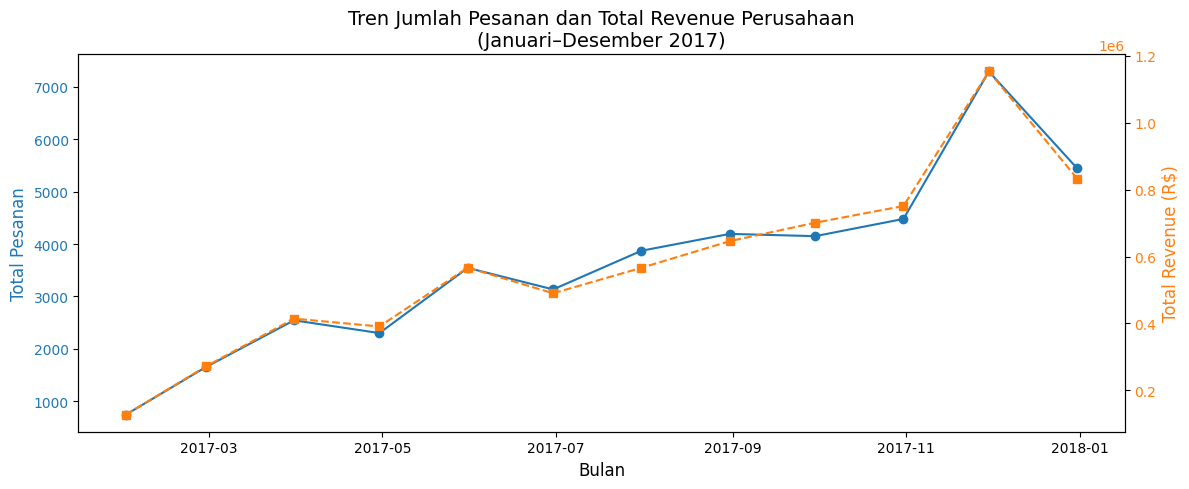

In [75]:
# Plot tren penjualan dan revenue
fig, ax1 = plt.subplots(figsize=(12, 5))

# Sumbu pertama: jumlah pesanan
ax1.set_title(
    "Tren Jumlah Pesanan dan Total Revenue Perusahaan\n(Januari–Desember 2017)",
    fontsize=14
)
ax1.set_xlabel("Bulan", fontsize=12)
ax1.set_ylabel("Total Pesanan", fontsize=12, color="tab:blue")

ax1.plot(
    sales_trend.index,
    sales_trend['total_orders'],
    marker='o',
    linestyle='-',
    color='tab:blue',
    label='Total Pesanan'
)
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Sumbu kedua: revenue
ax2 = ax1.twinx()
ax2.set_ylabel("Total Revenue (R$)", fontsize=12, color="tab:orange")

ax2.plot(
    sales_trend.index,
    sales_trend['total_revenue'],
    marker='s',
    linestyle='--',
    color='tab:orange',
    label='Total Revenue'
)
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Layout
fig.tight_layout()
plt.show()


**Insight:**

Grafik menunjukkan tren jumlah pesanan dan total revenue perusahaan selama periode Januari–Desember 2017. Secara umum terlihat adanya peningkatan aktivitas transaksi pada pertengahan hingga akhir tahun, yang juga diikuti oleh kenaikan total revenue. Hal ini mengindikasikan adanya korelasi positif antara volume pesanan dan pendapatan perusahaan pada periode tersebut

### Pertanyaan 2: Kategori produk apa yang paling banyak dan paling sedikit terjual sepanjang tahun 2017 berdasarkan total item yang terjual

/tmp/ipython-input-942645764.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


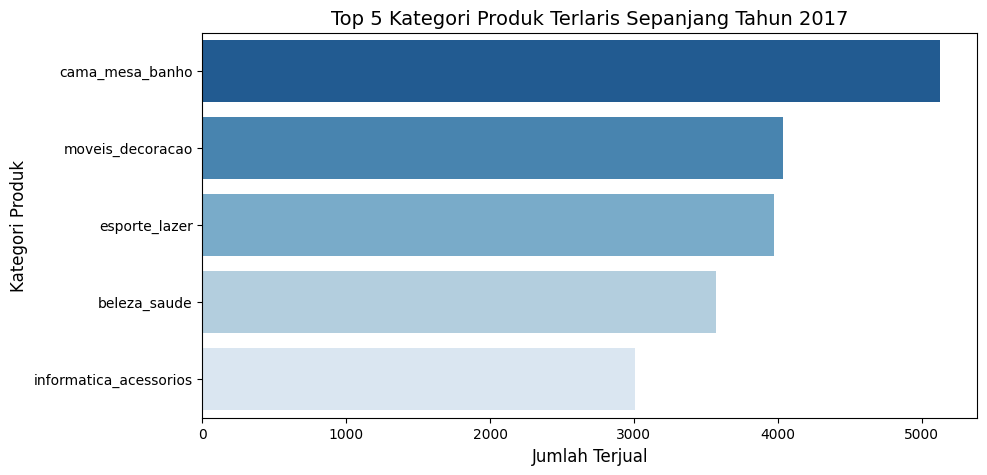

In [76]:
# Menghitung 5 kategori produk terlaris di tahun 2017
top5_2017 = (
    orders_df[orders_df["order_purchase_timestamp"].between("2017-01-01", "2017-12-31")]
    .merge(order_items_df, on="order_id")
    .merge(products_df, on="product_id")
    .groupby("product_category_name")["order_id"]
    .count()
    .sort_values(ascending=False)
    .head(5)
)

plt.figure(figsize=(10, 5))
sns.barplot(
    x=top5_2017.values,
    y=top5_2017.index,
    palette='Blues_r'
)

plt.xlabel("Jumlah Terjual", fontsize=12)
plt.ylabel("Kategori Produk", fontsize=12)
plt.title(
    "Top 5 Kategori Produk Terlaris Sepanjang Tahun 2017",
    fontsize=14
)
plt.show()

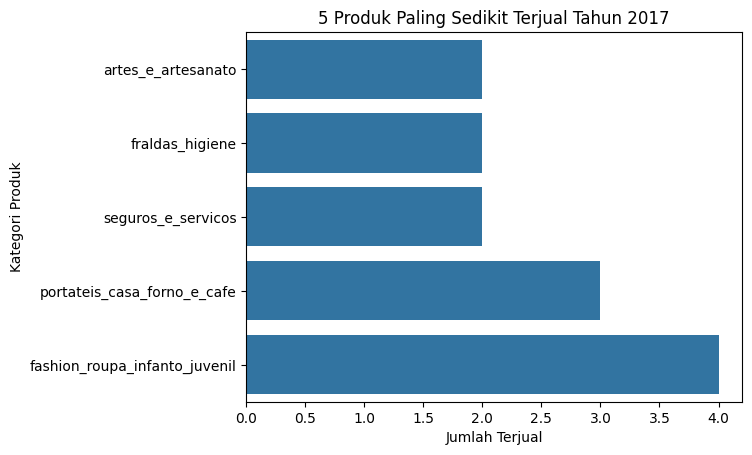

In [77]:
# Menampilan produk yang paling sedikit terjual di tahun 2017
least5_2017 = (
    orders_df[orders_df["order_purchase_timestamp"].between("2017-01-01", "2017-12-31")]
    .merge(order_items_df, on="order_id")
    .merge(products_df, on="product_id")
    .groupby("product_category_name")["order_id"]
    .count()
    .sort_values()
    .head(5)
)

sns.barplot(x=least5_2017.values, y=least5_2017.index)
plt.title("5 Produk Paling Sedikit Terjual Tahun 2017")
plt.xlabel("Jumlah Terjual")
plt.ylabel("Kategori Produk")
plt.show()

**Insight**

Berdasarkan analisis visul data transaksi e-commerce, terlihat adanya perbedaan yang signifikan antara kategori produk dengan tingkat penjualan tertinggi dan terendah. Pada tahun 2017, kategori **cama_mesa_banho**, **moveis_decoracao**, dan **esporte_lazer** menjadi kontributor utama penjualan dengan volume transaksi yang tinggi, mencerminkan kuatnya permintaan terhadap produk kebutuhan rumah tangga dan gaya hidup. Sebaliknya, kategori seperti **artes_e_artesanato**, **fraldas_higiene**, dan **seguros_e_servicos** menunjukkan tingkat penjualan yang relatif rendah, yang mengindikasikan pasar yang lebih niche atau perlunya evaluasi strategi pemasaran dan pengelolaan produk. Temuan ini dapat dimanfaatkan oleh perusahaan untuk memaksimalkan potensi kategori unggulan sekaligus meninjau kembali efektivitas strategi pada kategori dengan performa penjualan rendah.


### Pertanyaan 3: Bagaimana demografi pelanggan pada tahun 2018?

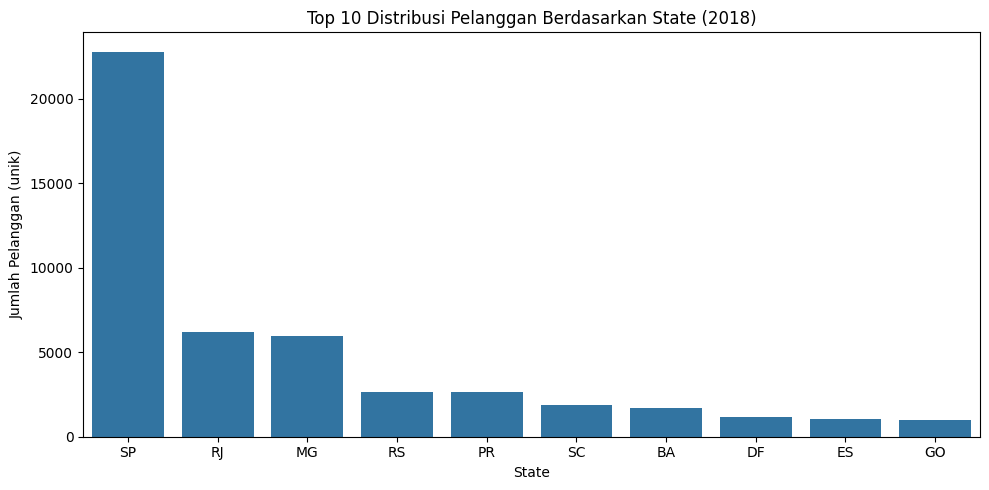

In [78]:
# Filter orders tahun 2018
orders_2018 = orders_df[
    orders_df["order_purchase_timestamp"].between("2018-01-01", "2018-12-31")
]

# Hitung pelanggan unik per state
top10_state_2018 = (
    orders_2018
    .merge(customers_df, on="customer_id")
    .groupby("customer_state")["customer_unique_id"]
    .nunique()
    .sort_values(ascending=False)
    .head(10)
)

# Visualisasi
plt.figure(figsize=(10, 5))
sns.barplot(x=top10_state_2018.index, y=top10_state_2018.values)

plt.title("Top 10 Distribusi Pelanggan Berdasarkan State (2018)")
plt.xlabel("State")
plt.ylabel("Jumlah Pelanggan (unik)")
plt.tight_layout()
plt.show()


### Insight
Pada tahun 2018, distribusi pelanggan menunjukkan konsentrasi yang sangat tinggi di State São Paulo (SP), menjadikannya wilayah dengan basis pelanggan terbesar dibandingkan state lainnya. State seperti Rio de Janeiro (RJ) dan Minas Gerais (MG) tetap menjadi kontributor penting meskipun jumlah pelanggannya jauh di bawah SP, sementara state lain memiliki jumlah pelanggan yang relatif lebih kecil. Temuan ini mengindikasikan bahwa perusahaan telah kuat di pasar utama, namun masih memiliki peluang untuk memperluas jangkauan pelanggan di wilayah lain melalui strategi pemasaran yang lebih terarah.

## Conclusion

## Kesimpulan

- Berdasarkan hasil analisis data transaksi e-commerce, dapat disimpulkan bahwa pada periode Januari–Desember 2017 terjadi tren peningkatan jumlah pesanan yang diikuti oleh kenaikan total revenue perusahaan, yang menunjukkan adanya hubungan positif antara volume transaksi dan pendapatan.

- Dari sisi produk, kategori **cama_mesa_banho**, **moveis_decoracao**, dan **esporte_lazer** menjadi kategori dengan penjualan tertinggi sepanjang tahun 2017.beberapa kategori lain seperti **artes_e_artesanato**, **fraldas_higiene**, dan **seguros_e_servicos** memiliki tingkat penjualan yang relatif rendah di tahun 2017,sehingga perlu dilakukan evaluasi strategi pengelolaan produk.

- Analisis demografi pelanggan tahun 2018 menunjukkan bahwa sebagian besar pelanggan berasal dari State **São Paulo (SP)**, diikuti oleh **Rio de Janeiro (RJ)** dan **Minas Gerais (MG)**, yang mengindikasikan konsentrasi pasar di wilayah tertentu serta peluang bagi perusahaan untuk memperluas jangkauan pasar ke state lain dengan basis pelanggan yang lebih kecil.


In [79]:
# Path dataset
dataset_path = "data"

# Load dataset
customers_df = pd.read_csv(os.path.join(dataset_path, "customers_dataset.csv"))
orders_df = pd.read_csv(os.path.join(dataset_path, "orders_dataset.csv"), parse_dates=["order_purchase_timestamp"])
order_items_df = pd.read_csv(os.path.join(dataset_path, "order_items_dataset.csv"))
products_df = pd.read_csv(os.path.join(dataset_path, "products_dataset.csv"))
product_translation_df = pd.read_csv(os.path.join(dataset_path, "product_category_name_translation.csv"))
sellers_df = pd.read_csv(os.path.join(dataset_path, "sellers_dataset.csv"))

# Gabungkan order_items_df dengan produk
merged_df = order_items_df.merge(products_df, on="product_id", how="left")
merged_df = merged_df.merge(product_translation_df, on="product_category_name", how="left")
merged_df = merged_df.merge(orders_df, on="order_id", how="left")
merged_df = merged_df.merge(customers_df, on="customer_id", how="left")
merged_df = merged_df.merge(sellers_df, on="seller_id", how="left")

# Tambahkan kolom order_purchase_month
merged_df["order_purchase_month"] = merged_df["order_purchase_timestamp"].dt.to_period("M")

# Pastikan direktori "data" ada
dashboard_path = "data"
os.makedirs(dashboard_path, exist_ok=True)

# menyimpan utama
merged_df.to_csv(os.path.join(dashboard_path, "main_data.csv"), index=False)

print("✅ File main_data.csv berhasil dibuat di:", dashboard_path)

✅ File main_data.csv berhasil dibuat di: data
